In [5]:
import cv2
import numpy as np
# from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt




In [7]:
# Load the image
image = cv2.imread(r"C:\Users\lenovo\Desktop\aon\aonimages\Untitled design (3) (1).png")

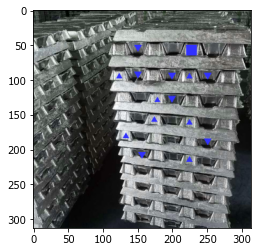

In [8]:
plt.imshow(image)

In [9]:
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

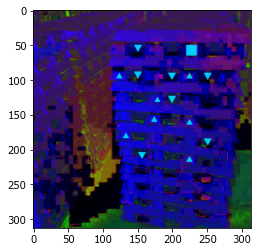

In [10]:
plt.imshow(hsv)

In [11]:
lower_red = np.array([0, 100, 100])
upper_red = np.array([10, 255, 255])
lower_red2 = np.array([170, 100, 100])
upper_red2 = np.array([179, 255, 255])

In [12]:
mask1 = cv2.inRange(hsv, lower_red, upper_red)
mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
mask = cv2.bitwise_or(mask1, mask2)

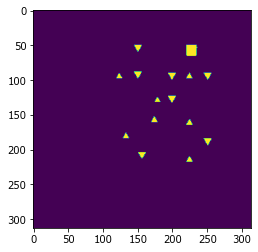

In [13]:
plt.imshow(mask)

In [14]:
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [15]:
# Initialize a counter for the red triangles
red_triangle_count = 0

# Iterate over the contours and filter red triangles
for contour in contours:
    # Approximate the contour to a polygon
    epsilon = 0.05 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)
    
    # If the polygon has 3 vertices, it is a triangle
    if len(approx) >= 3:
        # Draw a bounding box around the triangle
        cv2.drawContours(image, [approx], 0, (0, 255, 0), 2)
        
        # Increment the red triangle count
        red_triangle_count += 1


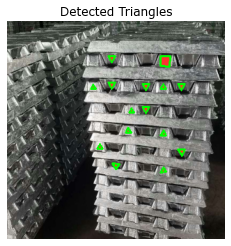

Number of red triangles: 15


In [16]:
# Display the image with detected triangles using matplotlib
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Detected Triangles")
plt.axis("off")
plt.show()

# Print the count of red triangles
print("Number of red triangles:", red_triangle_count)